# last layer embedding average

In [5]:
import sys
import os 
sys.path.append(os.path.dirname(sys.path[0]) + '/src')
import pandas as pd

train_df = pd.read_csv('../data/raw/sentipolc/training_set_sentipolc16.csv')
test_df = pd.read_csv('../data/raw/sentipolc/test_set_sentipolc16_gold2000.csv', escapechar='\\')

In [6]:
from models.bert_rep import BertRep
import numpy as np

bert_rep = BertRep()
train_df['hs'] = train_df.apply(lambda x: bert_rep.last_hidden_state_average([x['text']]), axis=1)
train_df = train_df.head(100)

test_df['hs'] = test_df.apply(lambda x: bert_rep.last_hidden_state_average([x['text']]), axis=1)
test_df = test_df.head(100)

KeyboardInterrupt: 

In [7]:
X_train = train_df['hs'].to_list()
y_train = train_df['iro'].to_list()

X_test = test_df['hs'].to_list()
y_test = test_df['iro'].to_list()


Precision iro: 0.432
Precision no iro: 0.922
Recall iro: 0.409
Recall no_iro: 0.929
F1 iro: 0.420
F1 no_iro: 0.925
F1 mean: 0.673
Accuracy: 0.868


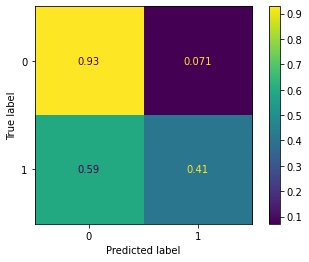

In [14]:
from sklearn import svm
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'degree': [3, 4, 5],
              'kernel': ['rbf','poly']}


grid = GridSearchCV(svm.SVC(class_weight = 'balanced'), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

y_pred = grid.predict(X_test)

pr_iro = precision_score(y_test, y_pred, pos_label=1)
pr_no_iro = precision_score(y_test, y_pred, pos_label=0)

rec_iro = recall_score(y_test, y_pred, pos_label=1)
rec_no_iro = recall_score(y_test, y_pred, pos_label=0)

f1_iro = f1_score(y_test, y_pred, pos_label=1)
f1_no_iro = f1_score(y_test, y_pred, pos_label=0)

acc = accuracy_score(y_test, y_pred,)

print('Precision iro: {0:.3f}'.format(pr_iro))
print('Precision no iro: {0:.3f}'.format(pr_no_iro))
print('Recall iro: {0:.3f}'.format(rec_iro))
print('Recall no_iro: {0:.3f}'.format(rec_no_iro))
print('F1 iro: {0:.3f}'.format(f1_iro))
print('F1 no_iro: {0:.3f}'.format(f1_no_iro))
print('F1 mean: {0:.3f}'.format((f1_iro+f1_no_iro)/2))
print('Accuracy: {0:.3f}'.format(acc))

cm = confusion_matrix(y_test, y_pred, labels=grid.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=grid.classes_)
disp.plot()
plt.show()

## Subjectivity

In [20]:
X_train = train_df['hs'].to_list()
y_train = train_df['subj'].to_list()

X_test = test_df['hs'].to_list()
y_test = test_df['subj'].to_list()

Precision subj: 0.972
Precision obj: 0.510
Recall subj: 0.503
Recall obj: 0.973
F1 subj: 0.663
F1 obj: 0.669
F1 mean: 0.666
Accuracy: 0.666


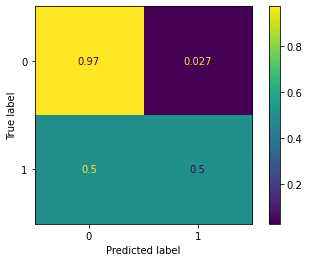

In [23]:
from sklearn import svm
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

clf = svm.SVC(kernel='poly', degree= 3 ,C = 1, class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


pr_subj = precision_score(y_test, y_pred, pos_label=1)
pr_obj = precision_score(y_test, y_pred, pos_label=0)

rec_subj = recall_score(y_test, y_pred, pos_label=1)
rec_obj = recall_score(y_test, y_pred, pos_label=0)

f1_subj = f1_score(y_test, y_pred, pos_label=1)
f1_obj = f1_score(y_test, y_pred, pos_label=0)

acc = accuracy_score(y_test, y_pred,)

print('Precision subj: {0:.3f}'.format(pr_subj))
print('Precision obj: {0:.3f}'.format(pr_obj))
print('Recall subj: {0:.3f}'.format(rec_subj))
print('Recall obj: {0:.3f}'.format(rec_obj))
print('F1 subj: {0:.3f}'.format(f1_subj))
print('F1 obj: {0:.3f}'.format(f1_obj))
print('F1 mean: {0:.3f}'.format((f1_obj+f1_subj)/2))
print('Accuracy: {0:.3f}'.format(acc))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=clf.classes_)
disp.plot()
plt.show()

# 4 layer concatenation

In [1]:
import sys
import os 
sys.path.append(os.path.dirname(sys.path[0]) + '/src')
import pandas as pd

train_df = pd.read_csv('../data/raw/sentipolc/training_set_sentipolc16.csv')
train_df = train_df.head(20)
#test_df = pd.read_csv('../data/raw/sentipolc/test_set_sentipolc16_gold2000.csv', escapechar='\\')

In [2]:
from models.bert_segmenter import BertSegmenter

bert_seg = BertSegmenter()
train_df['spans'] = train_df['text'].map(bert_seg.predict).values.tolist()

#test_df['spans'] = test_df['text'].map(bert_seg.predict).values.tolist()

In [3]:
from models.bert_rep import BertRep
import numpy as np

bert_rep = BertRep()
train_df['hs'] = train_df['spans'].map(bert_rep.hidden_states).values.tolist()

#test_df['hs'] = test_df['spans'].map(bert_rep.hidden_states).values.tolist()

In [4]:
import torch
X = train_df['hs'].tolist()
torch.save(X, '../data/other/embeddings/train_embeddings.pt')

#X = test_df['hs'].tolist()
#torch.save(X, '../data/other/embeddings/test_embeddings.pt')